# Spectrum Holding Summary Document

Code within notebook tests the shapefile processing to present as human-readable summaries of client number extracts.

In [1]:
# -------------------- WORKING DOCUMENT SETUP ------------------------
import rrl
import HCIS
import geopandas as gpd

data = rrl.readSpecData()
asmg = gpd.read_file('ASMG/asmg.shp')
data

,LICENCE_NO,CLIENT_NO,LW_FREQUENCY_START,LW_FREQUENCY_END,UP_FREQUENCY_START,UP_FREQUENCY_END,LW_BW,UP_BW,BANDWIDTH,AREA_CODE,AREA_NAME,AREA_DESCRIPTION
0,10143110,1136980,1960000000,1970000000,2.150000e+09,2.160000e+09,10000000,10000000.0,20000000.0,AP_10143110_3918,Brisbane,"NT9, NT5G, NT5H, NT5K, NT5L, NT5O, NT5P, NT6E,..."
1,10143110,1136980,1960000000,1970000000,2.150000e+09,2.160000e+09,10000000,10000000.0,20000000.0,AP_10143110_3919,Adelaide,"IW3J, IW3K, IW3L, IW3N, IW3O, IW3P, IW6B, IW6C..."
2,10143110,1136980,1960000000,1970000000,2.150000e+09,2.160000e+09,10000000,10000000.0,20000000.0,AP_10143110_3920,Perth,"BV1I, BV1J, BV1K, BV1L, BV1M, BV1N, BV1O, BV1P..."
3,10143110,1136980,1920000000,1935000000,2.110000e+09,2.125000e+09,15000000,15000000.0,30000000.0,AP_10143110_3916,Sydney,"NV7E, NV7F, NV7G, NV7H, NV7I, NV7J, NV7K, NV7L..."
4,10143110,1136980,1920000000,1935000000,2.110000e+09,2.125000e+09,15000000,15000000.0,30000000.0,AP_10143110_3917,Melbourne,"KX6G, KX6H, KX6J, KX6K, KX6L, LX1I, LX1M, LX1N..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1466,9599659,1103275,2365000000,2400000000,0.000000e+00,0.000000e+00,35000000,0.0,35000000.0,AP_9599659_2777,2.3 GHz Band,"IU, IV1, IV2, IV3"
1467,9599659,1103275,2302000000,2337000000,0.000000e+00,0.000000e+00,35000000,0.0,35000000.0,AP_9599659_2778,2.3 GHz Band,"GR, GS, HR, FR3, FR6, FR9, FS3, FS6, FS9, FT3,..."
1468,9619844,1136980,1740000000,1755000000,1.835000e+09,1.850000e+09,15000000,15000000.0,30000000.0,AP_9619844_2798,Sydney,"MW3B5, MW3B6, MW3B8, MW3B9, MW3C, MW3D, MW3F2,..."
1469,9619844,1136980,1745000000,1755000000,1.840000e+09,1.850000e+09,10000000,10000000.0,20000000.0,AP_9619844_2800,Merge: Brisbane + Merge: Adelaide + Perth,"NU2C1, NU2C2, NU2C3, NU2D1, NU2D2, NU2D3, NU2D..."


In [6]:
asmg.to_csv('debug.csv')
asmg

,HCIS_ID,geometry
0,GO3A1,"POLYGON ((132.00118 -9.99856, 132.08452 -9.998..."
1,GO3A2,"POLYGON ((132.08452 -9.99856, 132.16785 -9.998..."
2,GO3A3,"POLYGON ((132.16785 -9.99856, 132.25118 -9.998..."
3,GO3A4,"POLYGON ((132.00118 -10.08189, 132.08452 -10.0..."
4,GO3A5,"POLYGON ((132.08452 -10.08189, 132.16785 -10.0..."
...,...,...
86133,IU2C4,"POLYGON ((137.50129 -28.08186, 137.58462 -28.0..."
86134,IU2C5,"POLYGON ((137.58462 -28.08186, 137.66795 -28.0..."
86135,IU2C6,"POLYGON ((137.66795 -28.08186, 137.75128 -28.0..."
86136,IU2C7,"POLYGON ((137.50129 -28.16520, 137.58462 -28.1..."


In [4]:
# -------------------- TEST EXTRACT ------------------------
clientData = rrl.clientSearch(data, "1104504,20009217")
test = clientData.iloc[[6,7]]
test = rrl.buildgdf(test, asmg)
test


,LICENCE_NO,CLIENT_NO,LFREQ_START,LWFREQ_END,HIFREQ_START,HIFREQ_END,LW_BW,HI_BW,BANDWIDTH,AREA_CODE,AREA_NAME,HCIS,geometry
6,10143466,1104504,1935000000,1940000000,2.125000e+09,2.130000e+09,5000000,5000000.0,10000000.0,AP_10143466_4114,Perth,"BV1I, BV1J, BV1K, BV1L, BV1M, BV1N, BV1O, BV1P...",None
7,10143466,1104504,1965000000,1975000000,2.155000e+09,2.165000e+09,10000000,10000000.0,20000000.0,AP_10143466_4124,Regional Western Australia,"AU2, AU3, AU6, AU9, AV9, AW3, BU1, BU2, BU4, B...",None


In [5]:
import contextily as cx
from matplotlib import pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Australia'].plot(color='white', edgecolor='black')
fig = test.plot(ax=ax, column='CLIENT_NO', cmap='tab20', categorical=True, legend=True)

c:\Users\navni\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\array.py:926: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 0]),  # minx
c:\Users\navni\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\array.py:927: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 1]),  # miny
c:\Users\navni\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\array.py:928: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 2]),  # maxx
c:\Users\navni\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\array.py:929: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 3]),  # maxy


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

c:\Users\navni\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\geodataframe.py:2352: UserWarning: `keep_geom_type=True` in overlay resulted in 86 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


<AxesSubplot:>

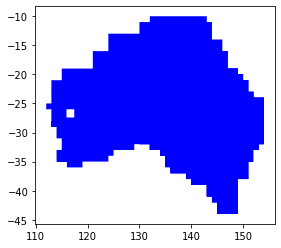

In [9]:
test = gdf.overlay(gdf, how='intersection')
test.plot(color="b")


## Geometric Approach to Unique Area Identification

Use geometric operations to create 

## Unique Area Function

The most challenging part of generating a holding summary is being able to remove overlapping HCIS cells from each area description entry. Removing overlapping HCIS cells is necessary to produce a two dimensional, human readable dataset.

In [ ]:

def getUniqueAreas(gdf):
    """Given a geodataframe, return a list of unique HCIS descriptions

    Args:
        gdf (GeoDataFrame): Client data geodataframe

    Returns:
        uniqueArea s: List of HCIS descriptions (list)
    """

    # Function Setup
    areaStrings = gdf['AREA_DESCRIPTION'].tolist()
    uniqueAreas = []

    for string in areaStrings:
        uniqueAreas.append(list(string.split(', ')))

    newAreas = []
    i = 0
    
    # Loop through every hcis for comparison
    for hcis1 in uniqueAreas:
        
        j = 0
        
        for hcis2 in uniqueAreas:
            
            # Ensure comparison of different HCIS cells
            if i != j:
                
                union = set(hcis1).intersection(set(hcis2))
                
                # If union is 0, there aren't any matches
                if len(union) == 0:
                    j = j + 1
                    continue
                
                # Duplicate HCIS
                elif set(hcis1) == union:
                    uniqueAreas.pop(j)
                    
                else:
                    newAreas.append(list(union))
                    uniqueAreas[i] = list(set(hcis1) - union)
                    uniqueAreas[j] = list(set(hcis2) - union)
                    
            j = j + 1
            
        i = i + 1

    uniqueAreas.append(newAreas)
    return uniqueAreas

uniqueAreas = getUniqueAreas(shp)
#print(uniqueAreas)

In [ ]:
# Loop testing

newAreas = []
i = 0
# Loop through every hcis for comparison
for hcis1 in uniqueAreas:
    
    j = 0
    
    for hcis2 in uniqueAreas:
        
        # Ensure comparison of different HCIS cells
        if i != j:
            
            union = set(hcis1).intersection(set(hcis2))
            
            # If union is 0, there aren't any matches
            if len(union) == 0:
                j = j + 1
                continue
            
            # Duplicate HCIS
            elif set(hcis1) == union:
                uniqueAreas.pop(j)
                
            else:
                newAreas.append(list(union))
                uniqueAreas[i] = list(set(hcis1) - union)
                uniqueAreas[j] = list(set(hcis2) - union)
                
        j = j + 1
        
    i = i + 1

uniqueAreas.append(newAreas)

uniqueAreas = getUniqueAreas(shp)
print(unique)

## Spectrum Holdings Builder

Using unique area descriptions and client number extract, a new dataset must be constructed summarising holdings for a given unique area description.

In [ ]:
# build gdf from unique areas
bands = set(specLicence['LICENCE_CATEGORY_NAME'])
bands

holdings = pd.DataFrame({
    "HCIS" : [],
    'Total BW' : [],
    '1800 MHz Band' : [],
    '2 GHz Band' : [],
    '2.3 GHz Band' : [],
    '2.5 GHz Band' : [],
    '2.5 GHz Mid Band Gap' : [],
    '20 GHz Defence Band' : [],
    '26 GHz Band' : [],
    '3.4 GHz Band' : [],
    '30 GHz Defence Band' : [],
    '700 MHz Band' : [],
    '800 MHz Band' : [],
    'AWL - FSS Only' : [],
    'AWL - Standard' : []
})
holdings

In [ ]:
# ------------------------------------------------------
# -------- Build holdings helper functions -------------
# ------------------------------------------------------

def intersection (HCIS, row):
    """Returns list of HCIS that is in both input HCIS list and input row.

    Args:
        HCIS (List): List of HCIS identifiers.
        row (Dataframe Row): Row from a client dataframe or shapefile.

    Returns:
        isin (List): List of HCIS identifiers in both inputs.
    """
    temp = set(row['AREA_DESCRIPTION'])
    isin = [value for value in HCIS if value in temp]
    return isin

def removeHCIS (AreaDescription, uaHCIS):
    newHCIS = []
    return newHCIS

def updateHoldings (row, holdings, uaHCIS):
    return

HCIS = uniqueAreas[-1]
print(HCIS)

In [ ]:
# ------------------------------------------------------
# -------- Build holdings primary function -------------
# ------------------------------------------------------

def buildHoldings (uniqueAreas, shp):
    """Given a list of unique area defined by HCIS sequences 
    and a geodataframe, generate a holdings summary.

    Args:
        uniqueAreas (List of Lists): List containing unique HCIS sequences
        shp (Geodataframe): Client Data geodataframe

    Returns:
        holdings: Holdings summary geodataframe
    """
    
    # Create empty dataset
    holdings = pd.DataFrame({
    "HCIS" : [],
    'Total BW' : [],
    '1800 MHz Band' : [],
    '2 GHz Band' : [],
    '2.3 GHz Band' : [],
    '2.5 GHz Band' : [],
    '2.5 GHz Mid Band Gap' : [],
    '20 GHz Defence Band' : [],
    '26 GHz Band' : [],
    '3.4 GHz Band' : [],
    '30 GHz Defence Band' : [],
    '700 MHz Band' : [],
    '800 MHz Band' : [],
    'AWL - FSS Only' : [],
    'AWL - Standard' : []
    })
    
    for uaHCIS in uniqueAreas:
        
        for index, row in shp.iterrows():
            
            isin = intersection(uaHCIS, row)
            
            # If uaHCIS is in entry[HCIS]
            if len(isin) != 0:
                
                shp.at[index]['LICENCE_AREA_DESCRIPTION'] = removeHCIS(shp.iloc[index]['LICENCE_AREA_LOCATION'], uaHCIS)
                
                updateHoldings = (row, holdings, uaHCIS)
            
            else:
                
                continue
            
    return holdings